<a href="https://colab.research.google.com/github/bxck75/A1_Colabs/blob/master/new_version_KARACartoonize_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pick a filesystem
filesystem = "colab" #@param ["colab", "drive"]

In [ ]:
# Pick a style
all_styles=["shinkai", "hayao", "hosoda", "paprika"]
styles = "paprika" #@param ["shinkai", "hayao", "hosoda", "paprika","all"]

In [20]:
# pick source 
source = 'upload' #@param ["upload","url"]

# Prepair

## set filesystem

In [2]:
if filesystem == 'drive':
  # sync google drive
  from google.colab import drive
  import os
  # if drive is needed uncomment
  print('Google drive ',end='')
  drive.mount('/content/drive',force_remount=True)
  print('Root folder set to ',end='')
  root = '/content/drive/My drive/Cartoonizer'
  print(root)
else:
  print('Root folder set to ',end='')
  root = '/content/Cartoonizer'
  print(root)

Root folder set to /content/Cartoonizer


## import needed stuff

In [3]:

# imports
import time,os,glob,cv2, itertools
os.chdir('/content')
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output, display, Image
from google.colab.patches import cv2_imshow
import ipywidgets as widgets
!apt install tree

# #pytorch implement pretrained files
# !git clone https://github.com/Yijunmaverick/CartoonGAN-Test-Pytorch-Torch.git
# os.chdir('CartoonGAN-Test-Pytorch-Torch')
# os.mkdir('uploaded_images')
# !bash pretrained_model/download_pth.sh
# os.chdir('/content')

#tensorflow implement
repo = "CartoonGan-tensorflow"
!git clone https://github.com/mnicnc404/{repo}.git
os.chdir(os.path.join(repo))
!pip install tensorflow-gpu==2.0.0-alpha0
!pip install imageio
!git clone https://www.github.com/keras-team/keras-contrib.git \
    && cd keras-contrib \
    && python convert_to_tf_keras.py \
    && USE_TF_KERAS=1 python setup.py install
  
# from subprocess import call
import tensorflow as tf
tf.__version__

# clear the long output
clear_output()

## Functions

In [4]:
#function defines
def resize(image,window_height = 1000):
    aspect_ratio = float(image.shape[1])/float(image.shape[0])
    window_width = window_height/aspect_ratio
    image = cv2.resize(image, (int(window_height),int(window_width)))
    return image

def download_image(url,input_file_name):
  !curl -o {input_file_name} {url}
  img = cv2.imread(input_file_name, cv2.IMREAD_UNCHANGED)
  return img

## Set I/O

In [5]:
# set i/o
input_folder = 'input'
output_folder = 'output'
# check if paths are in place
if not os.path.exists(root):
  os.mkdir(root)
  os.mkdir(root+'/'+output_folder)  
  os.mkdir(root+'/'+input_folder)
  

## Pauze to upload images to input folder

In [6]:
#input( "upload the image to " + root+'/'+input_folder )

In [7]:
!pip install ffmpeg ffprobe


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=3eed81564eb76b0c7f5ddca4a724efa37fa1841360660e40babdeb38972ba754
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
  Created wheel for ffprobe: filename=ffprobe-0.5-py3-none-any.whl size=3405 sha256=d1e008066914da98658466d3b9faaa1c602b881903f378af9d3d9fc2cc219e53
  Stored in directory: /root/.cache/pip/wheels/a2/66/e3/5da9a7e12ee519eed653b188eb8dd7ca780f5c882922beb15d
Successfully built ffmpeg ffprobe


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Split Audio from video and split video in frames


In [11]:
os.chdir("/content")

In [12]:
# get split and recombine scripts
!git clone https://github.com/graphific/DeepDreamVideo.git

Cloning into 'DeepDreamVideo'...
remote: Enumerating objects: 351, done.
remote: Total 351 (delta 0), reused 0 (delta 0), pack-reused 351
Receiving objects: 100% (351/351), 40.87 MiB | 33.01 MiB/s, done.
Resolving deltas: 100% (186/186), done.


In [18]:
os.chdir("DeepDreamVideo")
if os.path.exists("process_folder") == False:
    os.makedirs("process_folder")
    

FileNotFoundError: ignored

In [19]:
!sh 1_movie2frames.sh ffmpeg /content/MusicVideos/videoplayback.mp4 process_folder png

Removing files in process_folder/*
1_movie2frames.sh: 12: [: png: unexpected operator
1_movie2frames.sh: 20: [: avconv: unexpected operator
1_movie2frames.sh: 24: [: mplayer: unexpected operator
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librs

## Resize

In [ ]:
os.chdir(/content/CartoonGan-tensorflow)

In [ ]:
if source == 'url':
  # Set the img url
  img_url = input('Enter the image url : ')
  # extract the name and add the style
  img_name = img_url.split('.')
  img_ext = img_name[len(img_name)-1]
  img_name = img_name[len(img_name)-2]
  img_name = img_name.split('/')[2]
  img_name = img_name + '_' + styles +'.'+ img_ext
  print(img_in_folder+img_name)
  img_array = download_image(img_url,img_in_folder+img_name)

In [ ]:
# Set i/o folders
#img_in_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/garbage/llery_2k14s1'
#img_in_folder =  root+'/'+input_folder
img_out_folder = root+'/'+output_folder

In [ ]:
vid_to_split = '/content/drive/MyDrive/CartoonizerGoldie/OrbitalTheBox.mp4'

In [ ]:
!ffprobe {vid_to_split}

ffprobe version 4.2.7-0ubuntu0.1 Copyright (c) 2007-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --

In [ ]:

# Import everything needed to edit video clips
from moviepy.editor import *
import moviepy.editor as mp
import os

following arguments, specifying type where necessary:

image_folder_path is the directory of folder containing the images
fps is the number of frames per second
extension is the format of the images we are interested in. It could be .jpeg, .tiff, .png etc depending on the image format
video_name is the name of video file created
output_format is the format of the created video. It could be .mp4, .avi, .mov, etc

In [ ]:
#split of audio
#!mkdir {vid_to_split.replace('.mp4','')}
#!ffmpeg \
#    -i {vid_to_split} \
#    -map 0:a \
#    -y {vid_to_split.replace('.mp4','')}/audio.mp3

In [ ]:

#img_in_folder = vid_to_split.replace('.mp4','') + '/frames'
#!rm -r {img_in_folder}
#!mkdir {img_in_folder}

#!ffmpeg -i {vid_to_split} {img_in_folder}/frame%06d.jpg -hide_banner 

In [ ]:
#define remove and make process folders
#img_in_resized =  vid_to_split.replace('.mp4','') + '/frames_resized'
#img_in_processed = vid_to_split.replace('.mp4','') + '/frames_cartoon'
#!rm -r {img_in_resized} 
#!rm -r {img_in_processed} 
#!mkdir  {img_in_resized} 
#!mkdir  {img_in_processed} 

In [ ]:
#searchedfiles = glob.glob(img_in_folder+'/*.jpg')
#files = sorted( searchedfiles, key = lambda file: os.path.getctime(file))
#print(len(files))

187


In [ ]:
# custom write the process script to fix imshow issue in colab
%%writefile /content/resize_frame.py
import cv2,sys
 
img = cv2.imread(sys.argv[1], cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
# Filename
split_in = sys.argv[1].split('/')
filename = split_in[len(split_in) - 1]
print(sys.argv[2]+'/'+filename)

# Saving the image

cv2.imwrite( sys.argv[2]+'/'+filename, resized)


Overwriting /content/resize_frame.py


In [ ]:
# custom write the process script to fix imshow issue in colab
%%writefile /content/split_video.py
import cv2,sys,os

capture = cv2.VideoCapture(sys.argv[1])

frameNr = 0

while (True):

    success, frame = capture.read()

    if success:
        filename = sys.argv[2] + '/frame_'+str(frameNr)+'.jpg'
        print(filename)
        cv2.imwrite(filename, frame)

    else:
        break

    frameNr = frameNr+1

capture.release()

Overwriting /content/split_video.py


In [ ]:
movie_in = '/content/drive/MyDrive/CartoonizerGoldie/Kara.mp4'
split = movie_in.replace('.mp4','').split('/')
video_name = split[ len(split) - 1 ]

In [ ]:
process_folder = '/content/' + video_name
img_in = process_folder + '/frames'
img_out = process_folder +'/processed'
img_out_new = "/content/DeepDreamVideo/process_folder"
img_rez = process_folder +'/rez'
img_rez_new = "/content/DeepDreamVideo/pre_dream_process_folder"



In [ ]:
!mkdir {process_folder}
!mkdir {img_in}
!mkdir {img_out}
!mkdir {img_rez}



In [ ]:
!python /content/split_video.py {movie_in} {img_in}

In [ ]:
my_clip = mp.VideoFileClip(movie_in)
my_clip.audio.write_audiofile(process_folder+'/audio_out.mp3')

MoviePy - Writing audio in /content/Kara/audio_out.mp3


MoviePy - Done.


In [ ]:
audio_file = process_folder + '/audio_out.mp3'

In [ ]:
#get all frames
searchedfiles = glob.glob(img_in+'/*.jpg')
files = sorted( searchedfiles, key = lambda file: os.path.getctime(file))
print(len(files))
print(files[:100])

107428
['/content/Kara/frames/frame_0.jpg', '/content/Kara/frames/frame_1.jpg', '/content/Kara/frames/frame_2.jpg', '/content/Kara/frames/frame_3.jpg', '/content/Kara/frames/frame_4.jpg', '/content/Kara/frames/frame_5.jpg', '/content/Kara/frames/frame_6.jpg', '/content/Kara/frames/frame_7.jpg', '/content/Kara/frames/frame_8.jpg', '/content/Kara/frames/frame_9.jpg', '/content/Kara/frames/frame_10.jpg', '/content/Kara/frames/frame_11.jpg', '/content/Kara/frames/frame_12.jpg', '/content/Kara/frames/frame_13.jpg', '/content/Kara/frames/frame_14.jpg', '/content/Kara/frames/frame_15.jpg', '/content/Kara/frames/frame_16.jpg', '/content/Kara/frames/frame_17.jpg', '/content/Kara/frames/frame_18.jpg', '/content/Kara/frames/frame_19.jpg', '/content/Kara/frames/frame_20.jpg', '/content/Kara/frames/frame_21.jpg', '/content/Kara/frames/frame_22.jpg', '/content/Kara/frames/frame_23.jpg', '/content/Kara/frames/frame_24.jpg', '/content/Kara/frames/frame_25.jpg', '/content/Kara/frames/frame_26.jpg', '/c

In [ ]:
for f in files:
    !python /content/resize_frame.py {f} {img_rez} 50

In [ ]:
!cp {img_rez} /content/drive/MyDrive/CartoonizerGoldie/Resized

In [ ]:
# resize if needed
#max_size=479
# for file in files check height
#for f in files:
#    head, tail = os.path.split(f)
#    img = cv2.imread(f)
#    h,w,c = img.shape
    # Resize if needed
#    if h > max_size:
#        img_resized = resize(img, window_height = max_size + 1)
#        rh,rw,rc = img_resized.shape
#        cv2.imwrite(img_rez + '/' + tail, img_resized)

## Cartoon time

In [ ]:
def Run():
  
  !python cartoonize.py \
    --comparison_view grid \
    --keep_original_size \
    --batch_size 4 \
    --styles paprika \
    --input_dir /content/DeepDreamVideo/process_folder \
    --output_dir /content/DeepDreamVideo/Out_process_folder
  #!mv '{img_in_processed}/comparison' '{img_in_processed}/{styles}/comparison'
  
if styles == 'all':
    print('Looping over all styles')
    for styles in ["shinkai", "hayao", "hosoda", "paprika"]:
        Run()    
else:
    print('Running with '+styles+" style")
    Run()
  #!python cartoonize.py \
  # --comparison_view horizontal \
  #  --keep_original_size \
  #  --batch_size 1 \
  #  --styles '{styles}' \
  #  --input_dir '{img_in_resized}' \
  #  --output_dir '{img_in_processed}' 

  #!mv '{img_in_processed}/comparison' '{img_in_processed}/{styles}/comparison' 
  


In [ ]:
def images_to_video(image_folder_path, fps, extension, video_name, output_format):
    
    images = [image_folder_path+'/'+img for img in os.listdir(image_folder_path) if img.endswith(extension)]
    movie_clip = mp.ImageSequenceClip(images, fps)
    movie_clip.write_videofile(video_name+output_format)

images_to_video('/content/drive/MyDrive/CartoonizerGoldie/OrbitalTheBox/frames_cartoon/shinkai', \
            30, \
            '.jpg', \
            '/content/orbital', \
            '.mp4')

Original 2012-11-16, Updated 2016-04-05: cleanup and information about overlaying images.

When using ffmpeg to compress a video, I recommend using the libx264 codec, from experience it has given me excellent quality for small video sizes. I have noticed that different versions of ffmpeg will produce different output file sizes, so your mileage may vary.

To take a list of images that are padded with zeros (pic0001.png, pic0002.png…. etc) use the following command:


where the %04d means that zeros will be padded until the length of the string is 4 i.e 0001…0020…0030…2000 and so on. If no padding is needed use something similar to pic%d.png or %d.png.

-r is the framerate (fps)
-crf is the quality, lower means better quality, 15-25 is usually good
-s is the resolution
-pix_fmt yuv420p specifies the pixel format, change this as needed
the file will be output (in this case) to: test.mp4

In [ ]:
#folder = img_in_processed + '/'+ styles + '/'
#rawfiles = glob.glob(folder + '*.jpg')
#files = sorted( rawfiles, key = lambda file: os.path.getctime(file))
#count = 1
# count increase by 1 in each iteration
# iterate all files from a directory
#for file_name in files:
    # Construct old file name
#    source = file_name
#    print(source)
    # Adding the count to the new file name and extension
#    destination = folder + "frame" + str(count) + ".jpg"
#    print(destination)
    # Renaming the file
#    os.rename(source, destination)
#    count += 1

#print(len(files))

In [ ]:
#!ffmpeg -r 30 -f image2 -i {img_in_processed}/frame%06d.jpg -vcodec libx264 -crf 25 -pix_fmt yuv420p  {vid_to_split.replace('.mp4','')}/mutevideo.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
import os
import random

def chooseRandomImage(directory="."):
    allImages = []
    imgExtension = ["png", "jpeg", "jpg"] #Image Extensions to be chosen from
    for img in os.listdir(directory): #Lists all files
        ext = img.split(".")[len(img.split(".")) - 1]
        if (ext in imgExtension):
            allImages.append(img)
    choice = random.randint(0, len(allImages) - 1)
    chosenImage = allImages[choice] #Do Whatever you want with the image file
    return chosenImage

In [ ]:
#!rm /content/drive/MyDrive/CartoonizerGoldie/Weeeirdos/frames_cartoon/paprika/frame3808.jpg

rm: cannot remove '/content/drive/MyDrive/CartoonizerGoldie/Weeeirdos/frames_cartoon/paprika/frame3808.jpg': No such file or directory


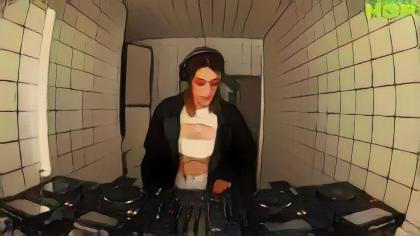

In [ ]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
# get random test img
rand_img = chooseRandomImage(img_out + '/' + styles)
img_nr='/content/drive/MyDrive/CartoonizerGoldie/Weeeirdos/frames_cartoon/paprika/frame3811.jpg'
# split path in head and tail
#head, tail = os.path.split(img_nr)
# read the img
im_cv = cv2.imread(img_nr)
cv2_imshow(im_cv)

#cv2.imwrite('/content/drive/MyDrive/CartoonizerGoldie/Weeeirdos/' + tail.replace('.','_cv_rgb.'), im_cv)


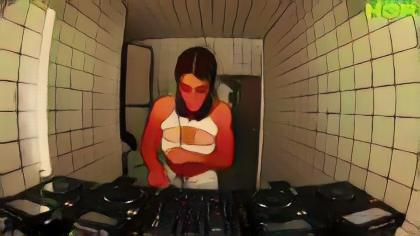

In [ ]:
from google.colab.patches import cv2_imshow
img_folder = img_in_processed+'/'+ styles
img = cv2.imread(img_folder +'/' + chooseRandomImage(img_folder))

cv2_imshow( img)

In [ ]:
# os.chdir('/content/CartoonGAN-Test-Pytorch-Torch')
# if styles == 'all':
#   for Styles in  ["shinkai", "hayao", "hosoda", "paprika"]:   
#     !python test.py --input_dir '/content/Cartoonizer/input' --style {styles} --gpu 0
# else:
#   Styles = styles
#   !python test.py --input_dir '/content/Cartoonizer/input' --style {styles} --gpu 0  


## Make grid

In [ ]:
import math
import os
import matplotlib.pyplot as plt
images_list= []
# Config:
images_dir = '/content/Cartoonizer/output'
result_grid_filename = '/content/Cartoonizer/output/grid.jpg'
result_figsize_resolution = 50 # 1 = 100px

for roots, dirs, files in os.walk(images_dir):
    for file in files:
        if file.endswith('.jpg'):
          images_list.append(roots+'/'+file)

# images_list = os.listdir(images_dir)
images_count = len(images_list)
# print('Images: ', images_list)
print('Images count: ', images_count)

# Calculate the grid size:
grid_size = math.ceil(math.sqrt(images_count))

# Create plt plot:
fig, axes = plt.subplots(grid_size, grid_size, figsize=(result_figsize_resolution, result_figsize_resolution))

current_file_number = 0
for image_filename in images_list:
  if image_filename != 'grid.jpg':
    x_position = current_file_number % grid_size
    y_position = current_file_number // grid_size

    plt_image = plt.imread(images_list[current_file_number])
    axes[x_position, y_position].imshow(plt_image)
    print((current_file_number + 1), '/', images_count, ': ', image_filename)

    current_file_number += 1

plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.savefig(result_grid_filename)

In [ ]:
from moviepy.editor import VideoFileClip, concatenate_videoclips

clip1 = VideoFileClip( root + video_name " + ".mp4")
clip2 = VideoFileClip( root + video_name " + ".mp4").subclip(50,60)
clip3 = VideoFileClip( root + video_name " + ".mp4")
# final_clip = concatenate_videoclips([clip1,clip2,clip3])
final_clip = clips_array([[clip1, clip2],
                          [clip3, clip4]])
final_clip.write_videofile(video_name+"_concatenation.mp4")

## Zip

In [ ]:
!zip -r /content/file.zip {img_out_folder}

updating: content/Cartoonizer/output/ (stored 0%)
updating: content/Cartoonizer/output/.tmp/ (stored 0%)
updating: content/Cartoonizer/output/hosoda/ (stored 0%)
updating: content/Cartoonizer/output/hosoda/jongensstandbeeld.jpg (deflated 1%)
updating: content/Cartoonizer/output/hosoda/comparison/ (stored 0%)
updating: content/Cartoonizer/output/hosoda/comparison/jongensstandbeeld.jpg (deflated 1%)
updating: content/Cartoonizer/output/grid.jpg (deflated 6%)
  adding: content/Cartoonizer/output/shinkai/ (stored 0%)
  adding: content/Cartoonizer/output/shinkai/comparison/ (stored 0%)
  adding: content/Cartoonizer/output/shinkai/comparison/alesund.jpg (deflated 0%)
  adding: content/Cartoonizer/output/shinkai/alesund.jpg (deflated 0%)
  adding: content/Cartoonizer/output/paprika/ (stored 0%)
  adding: content/Cartoonizer/output/paprika/comparison/ (stored 0%)
  adding: content/Cartoonizer/output/paprika/comparison/alesund.jpg (deflated 0%)
  adding: content/Cartoonizer/output/paprika/alesu